In [276]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from ppca import PPCA
from bpca import BPCA
from pca_all_impute import PCAImputer

## 10-5-Gaussian

In [223]:
cov1 = np.diag(np.array([5,4,3,2,1,0.5,0.5,0.5,0.5,0.5])**2)
data1 = np.random.multivariate_normal(np.zeros(10), cov1, size=1000)
mask_missing1 = np.random.choice(2, size=data1.shape, p=[0.9,0.1])
data_missing1 = data1.copy()
data_missing1[np.where(mask_missing1)] = np.nan

In [224]:
pca_imputer1 = PCAImputer(n_dimension=5)
data_pca_imputed1, mse_pca1 = pca_imputer1.fit_transform(data_missing1, verbose=True, trace_mse=True, cdata=data1, n_iteration=300)
ppca_imputer1 = PCAImputer('ppca', n_dimension=5)
data_ppca_imputed1, mse_ppca1 = ppca_imputer1.fit_transform(data_missing1, verbose=True, trace_mse=True, cdata=data1, n_iteration=300)
bpca_imputer1 = PCAImputer('bpca')
data_bpca_imputed1, mse_bpca1 = bpca_imputer1.fit_transform(data_missing1, verbose=True, trace_mse=True, cdata=data1, n_iteration=300)

Iter 0, MSE=5.794012
Iter 50, MSE=6.181317
Iter 100, MSE=7.048179
Iter 150, MSE=8.063744
Iter 200, MSE=9.270565
Iter 250, MSE=10.662109
Iter 0, MSE=5.739429
Iter 50, MSE=5.567439
Iter 100, MSE=5.559448
Iter 150, MSE=5.555139
Iter 200, MSE=5.551926
Iter 250, MSE=5.549829
Iter 0, MSE=5.734257
Iter 50, MSE=5.481035
Iter 100, MSE=5.452419
Iter 150, MSE=5.442815
Iter 200, MSE=5.434463
Iter 250, MSE=5.426908


In [258]:
mask_missing2 = np.random.choice(2, size=data1.shape, p=[0.6,0.4])
data_missing2 = data1.copy()
data_missing2[np.where(mask_missing2)] = np.nan
pca_imputer2 = PCAImputer(n_dimension=5)
data_pca_imputed2, mse_pca2 = pca_imputer2.fit_transform(data_missing2, verbose=True, trace_mse=True, cdata=data1, n_iteration=300)
ppca_imputer2 = PCAImputer('ppca', n_dimension=5)
data_ppca_imputed2, mse_ppca2 = ppca_imputer2.fit_transform(data_missing2, verbose=True, trace_mse=True, cdata=data1, n_iteration=300)
bpca_imputer2 = PCAImputer('bpca')
data_bpca_imputed2, mse_bpca2 = bpca_imputer2.fit_transform(data_missing2, verbose=True, trace_mse=True, cdata=data1, n_iteration=300)

Iter 0, MSE=26.740202
Iter 50, MSE=29.307513
Iter 100, MSE=34.759157
Iter 150, MSE=41.044198
Iter 200, MSE=47.340579
Iter 250, MSE=53.440734
Iter 0, MSE=26.284471
Iter 50, MSE=24.712853
Iter 100, MSE=24.866437
Iter 150, MSE=25.179056
Iter 200, MSE=25.497612
Iter 250, MSE=25.788400
Iter 0, MSE=25.757953
Iter 50, MSE=23.865459
Iter 100, MSE=23.847582
Iter 150, MSE=23.878446
Iter 200, MSE=23.852504
Iter 250, MSE=23.874657


In [277]:
mask_missing3 = np.random.choice(2, size=data1.shape, p=[0.3,0.7])
data_missing3 = data1.copy()
data_missing3[np.where(mask_missing3)] = np.nan
pca_imputer3 = PCAImputer(n_dimension=5)
data_pca_imputed3, mse_pca3 = pca_imputer3.fit_transform(data_missing3, verbose=True, trace_mse=True, cdata=data1, n_iteration=300)
ppca_imputer3 = PCAImputer('ppca', n_dimension=5)
data_ppca_imputed3, mse_ppca3 = ppca_imputer3.fit_transform(data_missing3, verbose=True, trace_mse=True, cdata=data1, n_iteration=300)
bpca_imputer3 = PCAImputer('bpca')
data_bpca_imputed3, mse_bpca3 = bpca_imputer3.fit_transform(data_missing3, verbose=True, trace_mse=True, cdata=data1, n_iteration=300)

/Users/djz/Desktop/Du's/Numerical Method/project/code/pca_all_impute.py:26: RuntimeWarning: Mean of empty slice
  row_means = np.repeat(np.nanmean(self._data, axis=1, out=row_defau).reshape(-1, 1), \


Iter 0, MSE=54.232136
Iter 50, MSE=55.734911
Iter 100, MSE=60.027018
Iter 150, MSE=63.113983
Iter 200, MSE=65.460194
Iter 250, MSE=67.331444
Iter 0, MSE=53.537205
Iter 50, MSE=49.476306
Iter 100, MSE=53.019891
Iter 150, MSE=55.583302
Iter 200, MSE=57.350514
Iter 250, MSE=58.664838
Iter 0, MSE=51.399875
Iter 50, MSE=41.421712
Iter 100, MSE=41.443748
Iter 150, MSE=41.399793
Iter 200, MSE=41.456173
Iter 250, MSE=41.458757


In [298]:
def impute_mean(data): 
    missing  = np.isnan(data)
    row_defau = np.zeros(data.shape[0])
    row_means = np.repeat(np.nanmean(data, axis=1, out=row_defau).reshape(-1, 1), \
                          data.shape[1], axis=1)
    data[missing] = row_means[missing]
    data = np.nan_to_num(data)
    return data
mean1, mean2, mean3 = impute_mean(data_missing1), impute_mean(data_missing2), impute_mean(data_missing3)
mean_mse1 = np.sum((data1-mean1)**2)/data1.shape[0]
mean_mse2 = np.sum((data1-mean2)**2)/data1.shape[0]
mean_mse3 = np.sum((data1-mean3)**2)/data1.shape[0]

/Users/djz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


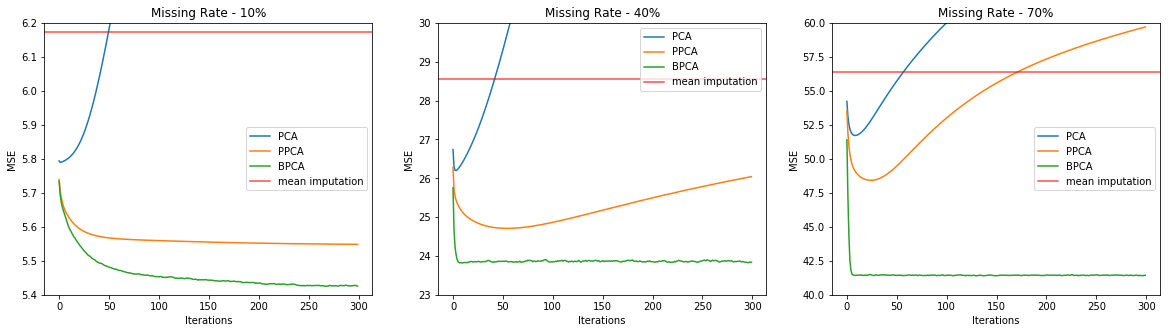

In [302]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(mse_pca1, label='PCA')
plt.plot(mse_ppca1, label='PPCA')
plt.plot(mse_bpca1, label='BPCA')
plt.axhline(mean_mse1, color='red', alpha=0.7, label='mean imputation')
plt.ylim(5.4,6.2)
plt.legend(loc='upper right')
plt.title('Missing Rate - 10%')
plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.subplot(1,3,2)
plt.plot(mse_pca2, label='PCA')
plt.plot(mse_ppca2, label='PPCA')
plt.plot(mse_bpca2, label='BPCA')
plt.axhline(mean_mse2, color='red', alpha=0.7, label='mean imputation')
plt.ylim(23,30)
plt.legend(loc='upper right')
plt.title('Missing Rate - 40%')
plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.subplot(1,3,3)
plt.plot(mse_pca3, label='PCA')
plt.plot(mse_ppca3, label='PPCA')
plt.plot(mse_bpca3, label='BPCA')
plt.axhline(mean_mse3, color='red', alpha=0.7, label='mean imputation')
plt.ylim(40,60)
plt.legend(loc='upper right')
plt.title('Missing Rate - 70%')
plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.show()

## 10-5-MLP

In [307]:
# 10-50-10

def sigmoid(x):
    return 1 / (1+np.exp(-x))

def relu(x):
    return x * (x > 0)

def sample_W(sizes):
    sizes = sizes
    weights = []
    for i in range(1, len(sizes)):
        n_in = sizes[i-1]
        n_out = sizes[i]
        W = np.random.normal(loc=0, scale=0.25, size=(n_in*n_out))
        b = np.zeros(n_out)
        weights.append(W)
        weights.append(b)
    return np.hstack(weights)

def mlp(X, W, sizes):
    i = 0
    net = None
    for l1, l2 in zip(sizes[:-1], sizes[1:]):
        net = X if net is None else relu(net)
        w = W[i:i+l1*l2].reshape(l1,l2); i += l1*l2
        b = W[i:i+l2]; i += l2
        net = np.dot(net, w) + b
    return net
    
sizes=[10,50,10]
w = sample_W(sizes)
data2 = mlp(data1, w, sizes)
mask_missing1 = np.random.choice(2, size=data2.shape, p=[0.9,0.1])
data_missing1 = data2.copy()
data_missing1[np.where(mask_missing1)] = np.nan

In [308]:
pca_imputer1 = PCAImputer(n_dimension=5)
data_pca_imputed1, mse_pca1 = pca_imputer1.fit_transform(data_missing1, verbose=True, trace_mse=True, cdata=data2, n_iteration=300)
ppca_imputer1 = PCAImputer('ppca', n_dimension=5)
data_ppca_imputed1, mse_ppca1 = ppca_imputer1.fit_transform(data_missing1, verbose=True, trace_mse=True, cdata=data2, n_iteration=300)
bpca_imputer1 = PCAImputer('bpca')
data_bpca_imputed1, mse_bpca1 = bpca_imputer1.fit_transform(data_missing1, verbose=True, trace_mse=True, cdata=data2, n_iteration=300)


Iter 0, MSE=3.359498
Iter 50, MSE=1.693608
Iter 100, MSE=2.015532
Iter 150, MSE=2.191521
Iter 200, MSE=2.293180
Iter 250, MSE=2.355229
Iter 0, MSE=2.768910
Iter 50, MSE=0.900960
Iter 100, MSE=0.900693
Iter 150, MSE=0.900692
Iter 200, MSE=0.900692
Iter 250, MSE=0.900692
Iter 0, MSE=2.605137
Iter 50, MSE=1.336104
Iter 100, MSE=1.339485
Iter 150, MSE=1.334153
Iter 200, MSE=1.337085
Iter 250, MSE=1.341458


In [311]:
mask_missing2 = np.random.choice(2, size=data2.shape, p=[0.6,0.4])
data_missing2 = data2.copy()
data_missing2[np.where(mask_missing2)] = np.nan
pca_imputer2 = PCAImputer(n_dimension=5)
data_pca_imputed2, mse_pca2 = pca_imputer2.fit_transform(data_missing2, verbose=True, trace_mse=True, cdata=data2, n_iteration=300)
ppca_imputer2 = PCAImputer('ppca', n_dimension=5)
data_ppca_imputed2, mse_ppca2 = ppca_imputer2.fit_transform(data_missing2, verbose=True, trace_mse=True, cdata=data2, n_iteration=300)
bpca_imputer2 = PCAImputer('bpca')
data_bpca_imputed2, mse_bpca2 = bpca_imputer2.fit_transform(data_missing2, verbose=True, trace_mse=True, cdata=data2, n_iteration=300)

Iter 0, MSE=19.080925
Iter 50, MSE=11.982241
Iter 100, MSE=13.193171
Iter 150, MSE=14.576309
Iter 200, MSE=15.890667
Iter 250, MSE=17.064541
Iter 0, MSE=16.502394
Iter 50, MSE=6.007003
Iter 100, MSE=6.126198
Iter 150, MSE=6.186926
Iter 200, MSE=6.215447
Iter 250, MSE=6.230357
Iter 0, MSE=16.944937
Iter 50, MSE=7.352821
Iter 100, MSE=7.352191
Iter 150, MSE=7.348630
Iter 200, MSE=7.363996
Iter 250, MSE=7.349948


In [312]:
mask_missing3 = np.random.choice(2, size=data2.shape, p=[0.3,0.7])
data_missing3 = data2.copy()
data_missing3[np.where(mask_missing3)] = np.nan
pca_imputer3 = PCAImputer(n_dimension=5)
data_pca_imputed3, mse_pca3 = pca_imputer3.fit_transform(data_missing3, verbose=True, trace_mse=True, cdata=data2, n_iteration=300)
ppca_imputer3 = PCAImputer('ppca', n_dimension=5)
data_ppca_imputed3, mse_ppca3 = ppca_imputer3.fit_transform(data_missing3, verbose=True, trace_mse=True, cdata=data2, n_iteration=300)
bpca_imputer3 = PCAImputer('bpca')
data_bpca_imputed3, mse_bpca3 = bpca_imputer3.fit_transform(data_missing3, verbose=True, trace_mse=True, cdata=data2, n_iteration=300)

/Users/djz/Desktop/Du's/Numerical Method/project/code/pca_all_impute.py:26: RuntimeWarning: Mean of empty slice
  row_means = np.repeat(np.nanmean(self._data, axis=1, out=row_defau).reshape(-1, 1), \


Iter 0, MSE=53.897146
Iter 50, MSE=54.389747
Iter 100, MSE=56.328839
Iter 150, MSE=57.692592
Iter 200, MSE=58.882115
Iter 250, MSE=59.978342
Iter 0, MSE=51.130942
Iter 50, MSE=37.845198
Iter 100, MSE=37.768827
Iter 150, MSE=37.881388
Iter 200, MSE=37.927591
Iter 250, MSE=37.846843
Iter 0, MSE=48.914913
Iter 50, MSE=20.950779
Iter 100, MSE=20.930011
Iter 150, MSE=20.947556
Iter 200, MSE=20.940732
Iter 250, MSE=20.955316


/Users/djz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


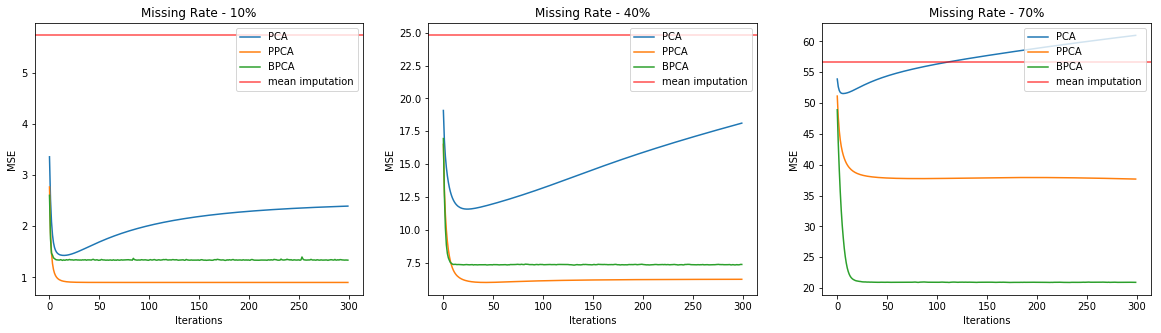

In [319]:
mean1, mean2, mean3 = impute_mean(data_missing1), impute_mean(data_missing2), impute_mean(data_missing3)
mean_mse1 = np.sum((data2-mean1)**2)/data1.shape[0]
mean_mse2 = np.sum((data2-mean2)**2)/data1.shape[0]
mean_mse3 = np.sum((data2-mean3)**2)/data1.shape[0]
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(mse_pca1, label='PCA')
plt.plot(mse_ppca1, label='PPCA')
plt.plot(mse_bpca1, label='BPCA')
plt.axhline(mean_mse1, color='red', alpha=0.7, label='mean imputation')
# plt.ylim(0.4,5)
plt.legend(loc='upper right')
plt.title('Missing Rate - 10%')
plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.subplot(1,3,2)
plt.plot(mse_pca2, label='PCA')
plt.plot(mse_ppca2, label='PPCA')
plt.plot(mse_bpca2, label='BPCA')
plt.axhline(mean_mse2, color='red', alpha=0.7, label='mean imputation')
# plt.ylim(23,30)
plt.legend(loc='upper right')
plt.title('Missing Rate - 40%')
plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.subplot(1,3,3)
plt.plot(mse_pca3, label='PCA')
plt.plot(mse_ppca3, label='PPCA')
plt.plot(mse_bpca3, label='BPCA')
plt.axhline(mean_mse3, color='red', alpha=0.7, label='mean imputation')
# plt.ylim(40,60)
plt.legend(loc='upper right')
plt.title('Missing Rate - 70%')
plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.show()

## 100-10-Gaussian

In [348]:
cov3 = np.diag(np.hstack((np.arange(10, 0, -1), 0.1 * np.ones(90))))
data3 = np.random.multivariate_normal(np.zeros(100), cov3, size=100)
mask_missing1 = np.random.choice(2, size=data3.shape, p=[0.9,0.1])
data_missing1 = data3.copy()
data_missing1[np.where(mask_missing1)] = np.nan

In [349]:
pca_imputer1 = PCAImputer(n_dimension=10)
data_pca_imputed1, mse_pca1 = pca_imputer1.fit_transform(data_missing1, verbose=True, trace_mse=True, cdata=data3, n_iteration=500)
ppca_imputer1 = PCAImputer('ppca', n_dimension=10)
data_ppca_imputed1, mse_ppca1 = ppca_imputer1.fit_transform(data_missing1, verbose=True, trace_mse=True, cdata=data3, n_iteration=500)
bpca_imputer1 = PCAImputer('bpca')
data_bpca_imputed1, mse_bpca1 = bpca_imputer1.fit_transform(data_missing1, verbose=True, trace_mse=True, cdata=data3, n_iteration=500)

Iter 0, MSE=5.658133
Iter 50, MSE=11.732605
Iter 100, MSE=20.247507
Iter 150, MSE=28.863175
Iter 200, MSE=36.948802
Iter 250, MSE=44.396930
Iter 300, MSE=51.238934
Iter 350, MSE=57.535598
Iter 400, MSE=63.349998
Iter 450, MSE=68.740120
Iter 0, MSE=5.663424
Iter 50, MSE=8.866280
Iter 100, MSE=11.051009
Iter 150, MSE=12.550004
Iter 200, MSE=13.619480
Iter 250, MSE=14.396656
Iter 300, MSE=14.967690
Iter 350, MSE=15.390224
Iter 400, MSE=15.704392
Iter 450, MSE=15.938871
Iter 0, MSE=15.655150
Iter 50, MSE=15.540770
Iter 100, MSE=11.639594
Iter 150, MSE=14.375206
Iter 200, MSE=16.331501
Iter 250, MSE=15.322202
Iter 300, MSE=13.726324
Iter 350, MSE=16.491279
Iter 400, MSE=14.606730
Iter 450, MSE=12.839459


In [340]:
mask_missing2 = np.random.choice(2, size=data3.shape, p=[0.6,0.4])
data_missing2 = data3.copy()
data_missing2[np.where(mask_missing2)] = np.nan
pca_imputer2 = PCAImputer(n_dimension=10)
data_pca_imputed2, mse_pca2 = pca_imputer2.fit_transform(data_missing2, verbose=True, trace_mse=True, cdata=data3, n_iteration=500)
ppca_imputer2 = PCAImputer('ppca', n_dimension=10)
data_ppca_imputed2, mse_ppca2 = ppca_imputer2.fit_transform(data_missing2, verbose=True, trace_mse=True, cdata=data3, n_iteration=500)
bpca_imputer2 = PCAImputer('bpca')
data_bpca_imputed2, mse_bpca2 = bpca_imputer2.fit_transform(data_missing2, verbose=True, trace_mse=True, cdata=data3, n_iteration=500)

Iter 0, MSE=22.978492
Iter 50, MSE=36.832774
Iter 100, MSE=49.329346
Iter 150, MSE=60.491154
Iter 200, MSE=70.652704
Iter 250, MSE=80.013132
Iter 300, MSE=88.733297
Iter 350, MSE=96.936141
Iter 400, MSE=104.693139
Iter 450, MSE=112.039878
Iter 0, MSE=22.953006
Iter 50, MSE=32.763314
Iter 100, MSE=39.485848
Iter 150, MSE=44.606499
Iter 200, MSE=48.720525
Iter 250, MSE=52.082555
Iter 300, MSE=54.886186
Iter 350, MSE=57.274527
Iter 400, MSE=59.333632
Iter 450, MSE=61.115519
Iter 0, MSE=58.420924
Iter 50, MSE=45.980226
Iter 100, MSE=55.115388
Iter 150, MSE=63.615749
Iter 200, MSE=52.276703
Iter 250, MSE=63.113168
Iter 300, MSE=59.681753
Iter 350, MSE=60.181942
Iter 400, MSE=66.096884
Iter 450, MSE=55.073551


In [341]:
mask_missing3 = np.random.choice(2, size=data3.shape, p=[0.3,0.7])
data_missing3 = data3.copy()
data_missing3[np.where(mask_missing3)] = np.nan
pca_imputer3 = PCAImputer(n_dimension=10)
data_pca_imputed3, mse_pca3 = pca_imputer3.fit_transform(data_missing3, verbose=True, trace_mse=True, cdata=data3, n_iteration=500)
ppca_imputer3 = PCAImputer('ppca', n_dimension=10)
data_ppca_imputed3, mse_ppca3 = ppca_imputer3.fit_transform(data_missing3, verbose=True, trace_mse=True, cdata=data3, n_iteration=500)
bpca_imputer3 = PCAImputer('bpca')
data_bpca_imputed3, mse_bpca3 = bpca_imputer3.fit_transform(data_missing3, verbose=True, trace_mse=True, cdata=data3, n_iteration=500)

Iter 0, MSE=45.290231
Iter 50, MSE=61.838185
Iter 100, MSE=70.400472
Iter 150, MSE=76.952916
Iter 200, MSE=82.455139
Iter 250, MSE=87.080839
Iter 300, MSE=91.129449
Iter 350, MSE=94.804790
Iter 400, MSE=98.209799
Iter 450, MSE=101.407065
Iter 0, MSE=45.262319
Iter 50, MSE=60.545853
Iter 100, MSE=68.300381
Iter 150, MSE=74.157626
Iter 200, MSE=78.944427
Iter 250, MSE=82.788431
Iter 300, MSE=86.004874
Iter 350, MSE=88.779522
Iter 400, MSE=91.220896
Iter 450, MSE=93.400702
Iter 0, MSE=126.113312
Iter 50, MSE=105.973842
Iter 100, MSE=90.703642
Iter 150, MSE=104.256372
Iter 200, MSE=107.867094
Iter 250, MSE=108.222207
Iter 300, MSE=117.902478
Iter 350, MSE=98.133587
Iter 400, MSE=120.805775
Iter 450, MSE=96.612666


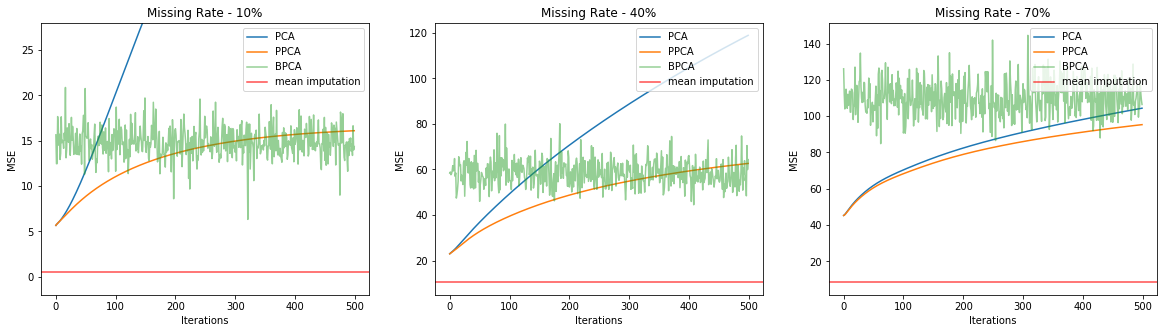

In [350]:
mean1, mean2, mean3 = impute_mean(data_missing1), impute_mean(data_missing2), impute_mean(data_missing3)
mean_mse1 = np.sum((data3-mean1)**2)/data1.shape[0]
mean_mse2 = np.sum((data3-mean2)**2)/data1.shape[0]
mean_mse3 = np.sum((data3-mean3)**2)/data1.shape[0]
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(mse_pca1, label='PCA')
plt.plot(mse_ppca1, label='PPCA')
plt.plot(mse_bpca1, label='BPCA',alpha=0.5)
plt.axhline(mean_mse1, color='red', alpha=0.7, label='mean imputation')
plt.ylim(-2,28)
plt.legend(loc='upper right')
plt.title('Missing Rate - 10%')
plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.subplot(1,3,2)
plt.plot(mse_pca2, label='PCA')
plt.plot(mse_ppca2, label='PPCA')
plt.plot(mse_bpca2, label='BPCA',alpha=0.5)
plt.axhline(mean_mse2, color='red', alpha=0.7, label='mean imputation')
# plt.ylim(23,30)
plt.legend(loc='upper right')
plt.title('Missing Rate - 40%')
plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.subplot(1,3,3)
plt.plot(mse_pca3, label='PCA')
plt.plot(mse_ppca3, label='PPCA')
plt.plot(mse_bpca3, label='BPCA',alpha=0.5)
plt.axhline(mean_mse3, color='red', alpha=0.7, label='mean imputation')
# plt.ylim(40,60)
plt.legend(loc='upper right')
plt.title('Missing Rate - 70%')
plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.show()